In [124]:
import numpy as np
import pandas as pd

In [125]:
from google.colab import files
uploaded = files.upload()

Saving user_demos50.csv to user_demos50 (2).csv


In [230]:
df = pd.read_csv('user_demos50.csv',error_bad_lines=False)

In [234]:
Data = df.copy()

In [235]:
Data.dropna(subset = ['user_id'], inplace = True)

In [127]:
df.head(5)

,screen_name,user_id,user_description,user_follower_count,verified,City,State,Country,gender,age,org
0,prageru,4.116028e+07,Free Videos. Free Minds.,563593.0,True,Los Angeles,CA,USA,NaN,NaN,True
1,GovNuclear,1.100064e+18,Making nuclear cool again 😎. Advancing new tec...,12137.0,True,DC,MD,USA,NaN,NaN,True
2,NEI,2.768828e+07,⁣Our vision is simple: A world powered by clea...,47014.0,True,DC,MD,USA,NaN,NaN,True
3,AaronMehta,1.030167e+08,Deputy editor and Pentagon Correspondent @Defe...,28842.0,True,DC,MD,USA,male,19-29,False
4,WashTimes,1.466235e+07,"Reliable reporting, hard-hitting analysis & br...",415154.0,True,DC,MD,USA,NaN,NaN,True


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5518 entries, 0 to 5517
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              5477 non-null   float64
 1   user_follower_count  5518 non-null   float64
 2   verified             5518 non-null   bool   
 3   gender               5518 non-null   object 
 4   age                  5518 non-null   object 
 5   org                  5334 non-null   object 
 6   City                 3374 non-null   object 
 7   State                4949 non-null   object 
dtypes: bool(1), float64(2), object(5)
memory usage: 350.3+ KB


In [214]:
df = df[['user_follower_count','verified','gender','age','org','City','State']]

In [236]:
Data = Data[['user_follower_count','verified','gender','age','org','City','State']]

In [15]:
df = df.dropna(axis=0,how='any')

In [66]:
df.fillna('Unknow')

,user_id,user_follower_count,verified,gender,age,org,City,State
0,4.11603e+07,563593.0,True,Unknow,Unknow,True,Los Angeles,CA
1,1.10006e+18,12137.0,True,Unknow,Unknow,True,DC,MD
2,2.76883e+07,47014.0,True,Unknow,Unknow,True,DC,MD
3,1.03017e+08,28842.0,True,male,19-29,False,DC,MD
4,1.46624e+07,415154.0,True,Unknow,Unknow,True,DC,MD
...,...,...,...,...,...,...,...,...
5513,2.60202e+09,3435.0,False,female,30-39,False,St. Louis,MO
5514,1.96591e+09,399.0,False,female,>=40,False,Ewing,NJ
5515,1.24622e+18,8.0,False,male,<=18,False,Unknow,AZ
5516,2.5944e+08,164.0,False,female,19-29,False,Vancouver,WA


In [129]:
! pip install kmodes
from kmodes.kprototypes import KPrototypes

In [130]:
Data = df.copy()

In [ ]:
Data['user_follower_count']

In [ ]:
from sklearn import preprocessing
Data['user_follower_count']=preprocessing.MinMaxScaler().fit_transform(Data['user_follower_count'])
Data.head()

In [143]:
Data.head(5)

,user_follower_count,verified,gender,age,org,City,State
0,0.083158,True,NaN,NaN,True,Los Angeles,CA
1,0.001791,True,NaN,NaN,True,DC,MD
2,0.006937,True,NaN,NaN,True,DC,MD
3,0.004256,True,male,19-29,False,DC,MD
4,0.061256,True,NaN,NaN,True,DC,MD


In [237]:
max = Data['user_follower_count'].max()

In [238]:
min = Data['user_follower_count'].min()

In [239]:
Data['user_follower_count'] = [(i-min)/max for i in Data['user_follower_count']]

In [80]:
Data = Data.fillna('Unknow')

In [75]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [81]:
Num_features =Data.select_dtypes(include=[np.number]).columns
hopkins(Data[Num_features])

0.9998754416672326

In [218]:
Data.drop('user_id',inplace=True,axis=1)

In [240]:
Data.head(5)

,user_follower_count,verified,gender,age,org,City,State
0,0.083158,True,NaN,NaN,True,Los Angeles,CA
1,0.001791,True,NaN,NaN,True,DC,MD
2,0.006937,True,NaN,NaN,True,DC,MD
3,0.004256,True,male,19-29,False,DC,MD
4,0.061256,True,NaN,NaN,True,DC,MD


In [241]:
len(Data)

5477

In [ ]:
Data['verified'][Data['verified'] == True] = 1
Data['org'][Data['org'] == True] = 1
Data['verified'][Data['verified'] == False] = 0
Data['org'][Data['org'] == False] = 0

In [243]:
Data.head(5)

,user_follower_count,verified,gender,age,org,City,State
0,0.083158,1.0,NaN,NaN,1,Los Angeles,CA
1,0.001791,1.0,NaN,NaN,1,DC,MD
2,0.006937,1.0,NaN,NaN,1,DC,MD
3,0.004256,1.0,male,19-29,0,DC,MD
4,0.061256,1.0,NaN,NaN,1,DC,MD


In [244]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")

In [245]:
Data = pd.DataFrame(imp.fit_transform(Data))

In [246]:
Data.columns = ['user_follower_count','verified','gender','age','org','City','State']

In [247]:
Data.drop('City',axis=1,inplace=True)

In [248]:
Data.head(5)

,user_follower_count,verified,gender,age,org,State
0,0.0831579,1,male,>=40,1,CA
1,0.00179081,1,male,>=40,1,MD
2,0.0069369,1,male,>=40,1,MD
3,0.00425562,1,male,19-29,0,MD
4,0.0612558,1,male,>=40,1,MD


In [249]:
len(Data)

5477

<function matplotlib.pyplot.show>

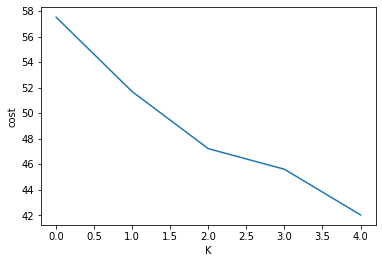

In [250]:
import matplotlib.pyplot as plt
cost = []
X = Data
for num_clusters in list(range(2,7)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42,n_jobs=-2,max_iter=15,n_init=50) 
    kproto.fit_predict(X, categorical=[1,2,3,4,5])
    cost.append(kproto.cost_)

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

In [251]:
cluster = KPrototypes(n_clusters=5, init='Huang', random_state=42,n_jobs=-2,max_iter=15,n_init=50)

In [202]:
Data = df.copy()

In [170]:
len(label)

5481

In [252]:
cluster.fit(Data, categorical=[1,2,3,4,5])

KPrototypes(cat_dissim=<function matching_dissim at 0x7fcbc5d441e0>,
            gamma=0.007578837994137536, init='Huang', max_iter=15, n_clusters=5,
            n_init=50, n_jobs=-2,
            num_dissim=<function euclidean_dissim at 0x7fcbc5d44268>,
            random_state=42, verbose=0)

In [255]:
label = cluster.fit_predict(Data, categorical=[1,2,3,4,5])

In [256]:
len(label)

5477

In [257]:
Data['cluster'] = label

In [163]:
Data.head(5)

,user_follower_count,verified,gender,age,org,State,cluster
0,0.0831579,1,male,>=40,1,CA,2
1,0.00179081,1,male,>=40,1,MD,2
2,0.0069369,1,male,>=40,1,MD,2
3,0.00425562,1,male,19-29,0,MD,2
4,0.0612558,1,male,>=40,1,MD,2


In [166]:
Data.cluster.value_counts()

2    2607
0    1608
1    1266
Name: cluster, dtype: int64

In [168]:
df['cluster'] = label

ValueError: ignored

In [231]:
df.dropna(subset = ['user_id'], inplace=True)

In [258]:
len(df)

5477

In [233]:
len(Data)

5518

In [259]:
df['cluster'] = label

In [181]:
len(label)

5481

In [186]:
len(df)

5518

In [184]:
df.isna().sum()

screen_name               0
user_id                  41
user_description        407
user_follower_count       0
verified                  0
City                   2144
State                   569
Country                   0
gender                  952
age                     952
org                     184
dtype: int64

In [260]:
df.sample(20)

,screen_name,user_id,user_description,user_follower_count,verified,City,State,Country,gender,age,org,cluster
610,rchiovoloni,7.200090e+08,Fifty years as a chef. Three years in the Army...,17.0,False,NaN,CT,USA,male,>=40,False,4
1078,CongMikeSimpson,7.613289e+07,Proudly representing Idaho's 2nd Congressional...,18228.0,True,DC,MD,USA,male,>=40,False,1
910,SteveDDees,1.673647e+09,Liberal Activist,402.0,False,Sheridan,WY,USA,male,>=40,False,4
2100,StockGuruDotCom,2.130649e+07,🚨 🚨 Get Profitable Stock Signal Alerts 🚨 🚨 📱 📱...,7959.0,False,NaN,NaN,USA,NaN,NaN,True,2
2500,notrealdemocrat,9.562572e+08,W1atArisTife1 Frilulian #RevolutionSoundtrack ...,2293.0,False,NaN,TN,USA,male,<=18,False,4
5138,maeamian,3.405877e+07,"Jareth A, paper fluffer for @12tonevideos, cur...",454.0,False,Boston,MA,USA,male,>=40,False,4
2077,Ratticorn,9.756023e+17,Semi-problematic Assault Rat. I simp for freedom.,317.0,False,NaN,DE,USA,male,19-29,False,3
4743,fairewinds,1.580734e+07,Moving Energy Education Forward.,4292.0,False,Charleston,SC,USA,NaN,NaN,True,2
1102,DaftContraire,1.254359e+18,"Just a dude that likes macro, trading ideas, s...",24.0,False,NaN,MD,USA,male,19-29,False,3
1229,jeremybloom,1.491896e+07,I'm the Editor of green site https://t.co/cNNC...,1678.0,False,NaN,NY,USA,male,>=40,False,4


In [261]:
df.to_csv('cluster.csv')